# **1.INSTALLING ALL IMPORTANT LIBRARIES**




In [ ]:
import numpy as np                                                      
import pandas as pd  
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 26.5 MB 44.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
!pip install jupyter-dash

     |████████████████████████████████| 7.3 MB 6.9 MB/s 
     |████████████████████████████████| 357 kB 45.9 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=ab60ada4d22d536e8d13689840ad678fd40f6e0572aeb101b9853afaf2ee299e
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=11f8e91f94b06c31a2c964c1957b2a46059cb9d2d272cdc90ae0bfac53d16d77
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=04dc3e5ec5c51fa619a039ee06aa4780358a65b7482484647977b765d142db85
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aefd2e2
Successfully built dash-core-components dash-html-com

In [ ]:
 import plotly.graph_objects as go
 import plotly.graph_objects as go
 import plotly.express as px
 from jupyter_dash import JupyterDash
 import dash_core_components as dcc
 import dash_html_components as html
 import pandas as pd
 from dash.dependencies import Input, Output 
 import  numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('trec')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/trec/1.0.0.incomplete5LLFXC/trec-train.tfrecord


  0%|          | 0/5452 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/trec/1.0.0.incomplete5LLFXC/trec-test.tfrecord


  0%|          | 0/500 [00:00<?, ? examples/s]

Dataset trec downloaded and prepared to /root/tensorflow_datasets/trec/1.0.0. Subsequent calls will reuse this data.


# **2.DATA PREPARATION**


In [ ]:
ds

{'test': <PrefetchDataset shapes: {label-coarse: (), label-fine: (), text: ()}, types: {label-coarse: tf.int64, label-fine: tf.int64, text: tf.string}>,
 'train': <PrefetchDataset shapes: {label-coarse: (), label-fine: (), text: ()}, types: {label-coarse: tf.int64, label-fine: tf.int64, text: tf.string}>}

In [ ]:
train_dataset, test_dataset = ds["train"], ds["test"]


In [ ]:
# Now, we add our dataset here. To do that we need to upload the csv file on google colab
from google.colab import files
uploaded = files.upload()

Saving labels_final.csv to labels_final.csv


**#reading labels dataframe**


In [ ]:
# read labels dataframe
labels_df = pd.read_csv("labels_final.csv",index_col=0) 
labels_df.head()


,Description,label-fine
label_name,,
abb,abbreviation,0
exp,expression abbreviated,1
animal,animals,2
body,organs of body,3
color,colors,4


In [ ]:
labels_df.drop(['Description'],axis=1)


,label-fine
label_name,
abb,0
exp,1
animal,2
body,3
color,4
creative,5
currency,6
dis.med.,7
event,8


In [ ]:
new=tfds.as_numpy(train_dataset)
new_train_1=pd.DataFrame(new)

new_train_1.head()

,label-coarse,label-fine,text
0,3,4,b'Who was Camp David named for ?'
1,0,7,b'What is the C programming language ?'
2,5,14,b'Where is the oldest living thing on earth ?'
3,4,13,b'How many claws has a lobster called a pistol...
4,3,4,"b""What son of a 15-year-old Mexican girl and a..."


In [ ]:
new1=tfds.as_numpy(test_dataset)
new_test_1=pd.DataFrame(new1)
new_test_1.head()

,label-coarse,label-fine,text
0,5,14,b'Where is the volcano Mauna Loa ?'
1,3,4,"b""Who was the abolitionist who led the raid on..."
2,4,8,b'When was Lyndon B. Johnson born ?'
3,5,14,b'What planet has the strongest magnetic field...
4,1,22,b'What is the only artery that carries blue bl...


In [ ]:
merge_df=pd.merge(new_train_1,labels_df, on="label-fine")
merge_df.head()


,label-coarse,label-fine,text,Description
0,3,4,b'Who was Camp David named for ?',colors
1,3,4,"b""What son of a 15-year-old Mexican girl and a...",colors
2,3,4,b'What American won the world Grand Prix drivi...,colors
3,3,4,b'Who killed JFK ?',colors
4,3,4,"b""Name Dick Tracy 's two children .""",colors


In [ ]:
merge_df['Description'].value_counts()

colors                                         962
plants                                         733
diseases and medicine                          421
other entities                                 363
letters like a-z                               321
abbreviation                                   276
events                                         218
expression abbreviated                         207
food                                           191
inventions, books and other creative pieces    189
elements and substances                        155
equivalent terms                               129
animals                                        112
words with a special property                  103
sports                                         103
techniques and methods                          93
reasons                                         75
description of sth.                             71
organs of body                                  70
languages                      

**PRE PROCESSING THE DATASET AND REMOVING STOP WORDS AND CLEANING THE TEXT DATA **bold text**


In [ ]:

nltk.download('stopwords')
nltk.download('wordnet')
lst_stopwords = nltk.corpus.stopwords.words("english")
print(lst_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'a

In [ ]:
#lemmatizing and stemming and removing stop words
#removing stopwords and punctutions from the text

def cleaningtext(text, flg_stemm, flg_lemm):
  #removing space and converting to lower case
  text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
  lst_text = text.split()
    ## remove Stopwords
  if lst_stopwords is not None:
    lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    # Stemming 
  if flg_stemm == True:
    ps = nltk.PorterStemmer()
    lst_text = [ps.stem(word) for word in lst_text]
                
    # Lemmatisation 
  if flg_lemm == True:
    lem = nltk.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
  text = " ".join(lst_text)
  return text

In [ ]:
#DISPLAYING CLEAN TEXT
merge_df["clean_text"]=merge_df["text"].apply(lambda x: cleaningtext(x, flg_stemm=False, flg_lemm=False ))
merge_df.head()

,label-coarse,label-fine,text,Description,clean_text
0,3,4,b'Who was Camp David named for ?',colors,bwho camp david named
1,3,4,"b""What son of a 15-year-old Mexican girl and a...",colors,bwhat son 15yearold mexican girl halfirish fat...
2,3,4,b'What American won the world Grand Prix drivi...,colors,bwhat american world grand prix driving champi...
3,3,4,b'Who killed JFK ?',colors,bwho killed jfk
4,3,4,"b""Name Dick Tracy 's two children .""",colors,bname dick tracy two children


# 3.EXPLORATORY DATA ANALYSIS

BAR PLOT FOR FINE LABELS DESCRIPTIONS DEPICTING HOW OFTEN A PARTICULAR  FINE 

LABEL IS OCCURING IN THE DATASET


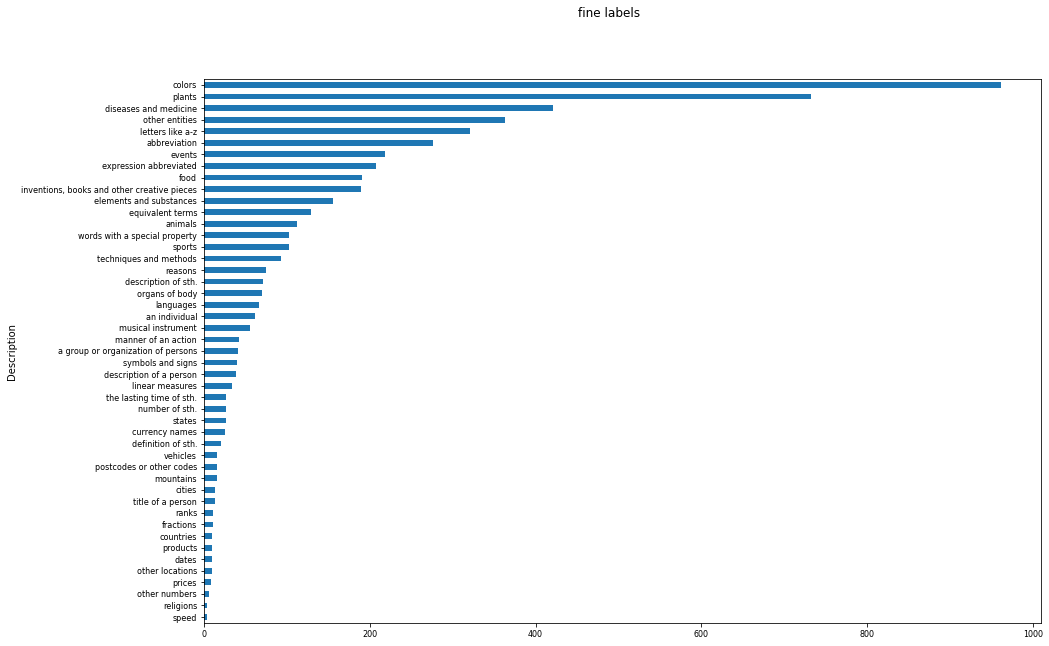

In [ ]:

fig, ax = plt.subplots()
fig.suptitle('fine labels', fontsize=12)
merge_df["Description"].reset_index().groupby("Description").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, ax=ax,figsize=(15,10),fontsize=8)
plt.show()

In [ ]:
# Now, we add our dataset here. To do that we need to upload the csv file on google colab
from google.colab import files
uploaded = files.upload()

Saving coarse_label.csv to coarse_label.csv


In [ ]:
# read labels dataframe
clabel_df = pd.read_csv("coarse_label.csv",index_col=0) 
clabel_df.head()

,coarse_label
label-coarse,
0,ABBR - Abbreviation
1,DESC - Description and abstract concepts
2,ENTY - Entities
3,HUM - Human beings
4,LOC - Locations


In [ ]:
merge_df1=pd.merge(merge_df,clabel_df, on="label-coarse")
merge_df1.head()

,label-coarse,label-fine,text,Description,clean_text,coarse_label
0,3,4,b'Who was Camp David named for ?',colors,bwho camp david named,HUM - Human beings
1,3,4,"b""What son of a 15-year-old Mexican girl and a...",colors,bwhat son 15yearold mexican girl halfirish fat...,HUM - Human beings
2,3,4,b'What American won the world Grand Prix drivi...,colors,bwhat american world grand prix driving champi...,HUM - Human beings
3,3,4,b'Who killed JFK ?',colors,bwho killed jfk,HUM - Human beings
4,3,4,"b""Name Dick Tracy 's two children .""",colors,bname dick tracy two children,HUM - Human beings


In [102]:
#label encoding the categories. After this each category would be mapped to an integer.
encoder = LabelEncoder()
merge_df['categoryEncoded'] = encoder.fit_transform(merge_df['Description'])
merge_df.head()

,label-coarse,label-fine,text,Description,clean_text,categoryEncoded
0,3,4,b'Who was Camp David named for ?',colors,bwho camp david named,5
1,3,4,"b""What son of a 15-year-old Mexican girl and a...",colors,bwhat son 15yearold mexican girl halfirish fat...,5
2,3,4,b'What American won the world Grand Prix drivi...,colors,bwhat american world grand prix driving champi...,5
3,3,4,b'Who killed JFK ?',colors,bwho killed jfk,5
4,3,4,"b""Name Dick Tracy 's two children .""",colors,bname dick tracy two children,5


BAR PLOT FOR FINE LABELS DESCRIPTIONS DEPICTING HOW OFTEN A PARTICULAR COARSE 

LABEL IS OCCURING IN THE DATASET

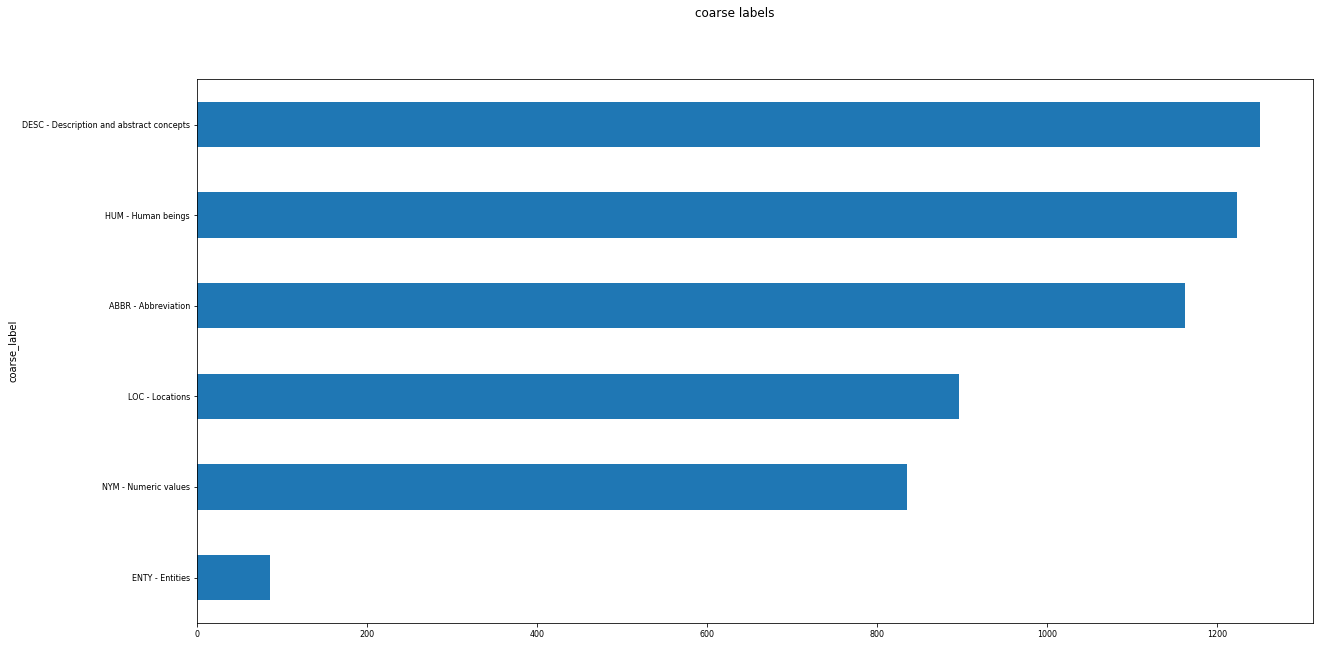

In [ ]:

fig, ax = plt.subplots()
fig.suptitle('coarse labels ', fontsize=12)
merge_df1["coarse_label"].reset_index().groupby("coarse_label").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, ax=ax,figsize=(20,10),fontsize=8)
plt.show()

**TREE MAP DEPICTING RELATIONSHIP BETWEEN FINE LABEL AND COARSE LABEL**

In [ ]:
fig = px.treemap(merge_df, path=['Description'], color='label-coarse')
fig.show()

**word cloud for most generated words**





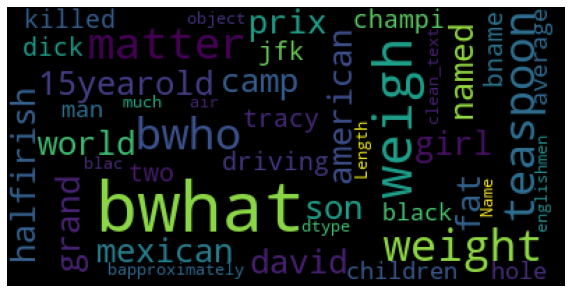

In [ ]:
# Visualization- wordcloud:
!pip install wordcloud
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordcloud
word_cloud = wordcloud.WordCloud(background_color='black', max_words=10000, 
                         max_font_size=50)
word_cloud = word_cloud.generate(str(merge_df['clean_text']))
fig = plt.figure(num=1,figsize=(10,10)); plt.axis('off')
plt.imshow(word_cloud, cmap=None); 
plt.show()

In [ ]:
!pip install transformers


     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 3.3 MB 23.3 MB/s 
     |████████████████████████████████| 61 kB 480 kB/s 
     |████████████████████████████████| 895 kB 47.3 MB/s 
     |████████████████████████████████| 596 kB 35.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# 4.BERT TRANSFORMER

In [ ]:
model_name = "bert-base-uncased"
max_length = 512

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        texts, 
        return_attention_masks=False, 
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    
    return np.array(enc_di['input_ids'])

#4. SPLITING DATASET INTO TRAIN AND TEST

In [77]:
X_train,X_test ,y_train,y_test = train_test_split(merge_df['clean_text'], merge_df['categoryEncoded'], random_state = 2020, test_size = 0.3)

TOKENIZING TEXT AND CONVERTING LABELS TO ONE HOT VECTORS


In [78]:
Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen=80)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes=50,dtype = 'int32')
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen=80)
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes=50,dtype = 'int32')

Streaming output truncated to the last 5000 lines.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognize

#5 BUILDING MODEL

In [79]:
def build_model(transformer, loss='categorical_crossentropy', max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    #adding dropout layer
    x = tf.keras.layers.Dropout(0.3)(cls_token)
    #using a dense layer of 50 neurons as the number of unique categories is 50. 
    out = tf.keras.layers.Dense(50, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=input_word_ids, outputs=out)
    #using categorical crossentropy as the loss as it is a multi-class classification problem
    model.compile(tf.keras.optimizers.Adam(lr=2e-5), loss=loss, metrics=['accuracy'])
    return model

In [80]:
import transformers

In [81]:
 
#building the model 
transformer_layer = transformers.TFAutoModel.from_pretrained('bert-base-uncased')
model = build_model(transformer_layer, max_len=80)
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 80)]             0         
                                                                 
 tf_bert_model_2 (TFBertMode  TFBaseModelOutputWithPoo  109482240
 l)                          lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             80, 768),                           
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



# 6 TRAINING THE MODEL


In [82]:
#creating the training and testing dataset.
BATCH_SIZE =32
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((Xtrain_encoded, ytrain_encoded))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(Xtest_encoded)
    .batch(BATCH_SIZE)
)

In [83]:
n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    epochs=5
)

Epoch 1/5


119/119 [==============================] - 171s 1s/step - loss: 2.7617 - accuracy: 0.2981
Epoch 2/5
119/119 [==============================] - 121s 1s/step - loss: 1.2450 - accuracy: 0.6857
Epoch 3/5
119/119 [==============================] - 121s 1s/step - loss: 0.6691 - accuracy: 0.8272
Epoch 4/5
119/119 [==============================] - 121s 1s/step - loss: 0.3934 - accuracy: 0.8999
Epoch 5/5
119/119 [==============================] - 121s 1s/step - loss: 0.2272 - accuracy: 0.9433


In [84]:
#making predictions
preds = model.predict(test_dataset,verbose = 1)
#converting the one hot vector output to a linear numpy array.
pred_classes = np.argmax(preds, axis = 1)

52/52 [==============================] - 21s 337ms/step


In [85]:
#extracting the classes from the label encoder
encoded_classes = encoder.classes_
#mapping the encoded output to actual categories
predicted_category = [encoded_classes[x] for x in pred_classes]
true_category = [encoded_classes[x] for x in y_test]


# 7 caLCULATING ACCURACY


In [86]:
acc=train_history.history['accuracy']
acc

[0.2980567216873169,
 0.685661792755127,
 0.8272058963775635,
 0.899947464466095,
 0.9432772994041443]

#  8 MAKING PREDICTIONS

In [87]:
result_df = pd.DataFrame({'description':X_test,'true_category':true_category, 'predicted_category':predicted_category})
result_df.head()

,description,true_category,predicted_category
2061,bwhere battle bulge take place,plants,plants
2512,bhow easily remove red wine stains tshirts,abbreviation,abbreviation
2985,bwhat 10 plagues egypt,words with a special property,words with a special property
5231,bwhat trademark washington redskin fan,ranks,plants
290,bwho built first successful stern wheel steamboat,colors,"inventions, books and other creative pieces"


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.metrics import confusion_matrix

In [89]:
print(f"Accuracy is {sklearn.metrics.accuracy_score(result_df['true_category'], result_df['predicted_category'])}")

Accuracy is 0.8551344743276283


In [91]:
result_df.to_csv('testPredictions.csv', index = False)

In [92]:
result_df[result_df['true_category']!=result_df['predicted_category']]

,description,true_category,predicted_category
5231,bwhat trademark washington redskin fan,ranks,plants
290,bwho built first successful stern wheel steamboat,colors,"inventions, books and other creative pieces"
2079,bwhat kind education need become flight attendant,plants,letters like a-z
3418,bwhat happened january 15 1969,musical instrument,letters like a-z
4878,bwhat afterdinner treat invented 1916 george j...,sports,words with a special property
...,...,...,...
2779,bwhen tutankhamun exhibit display us moving co...,"inventions, books and other creative pieces",events
1958,bname operating system runs ibmcompatible mach...,plants,manner of an action
1957,bwhat humans catch zoonose diseases,plants,animals
425,bname cartoon genie conjured magic ring shared...,colors,expression abbreviated


In [94]:
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
confusion_mat

array([[ 7,  0,  0, ...,  0,  0,  0],
       [ 0, 79,  0, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 1,  0,  0, ...,  0,  0, 30]])

#9 MAKING CONFUSION MATRIX

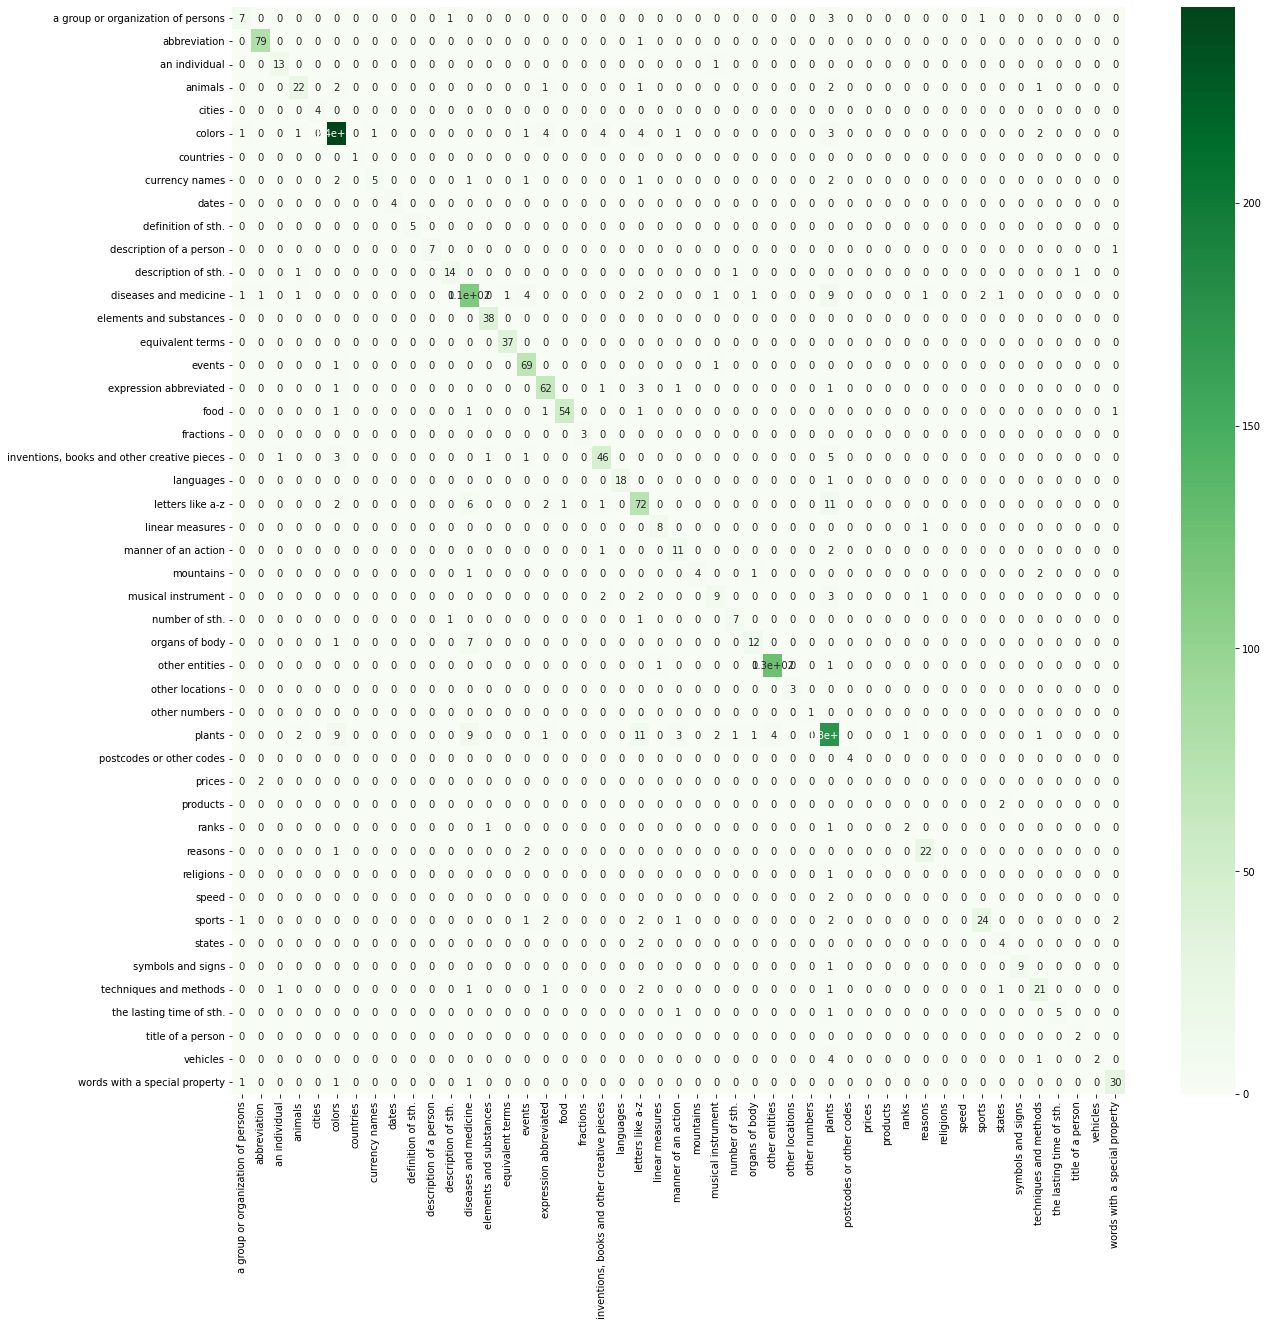

In [101]:
df_cm = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
plt.rcParams['figure.figsize'] = (20,20)
sns.heatmap(df_cm ,annot=True, cmap="Greens")

## ABOVE MODEL CAN BE IMPROVED AND BETTER ACCURACY CAN BE OBTAINED IF WE FINE TUNE THE BERT TRANSFORMER ALSO WE CAN TRY TO CHANGE OUR MODEL PARAMETERS TO BETTER ACCURACY


1.   for the build above initially I used relu and software  activation function but it was providing poor accurcay of about only 50% on the training data so I tried changing the activation function and used sigmoid activation function which inturn provided better accuracy.
